In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date

In [42]:
df_train=pd.read_csv('train.csv')

In [43]:
df_train=df_train.dropna()

In [44]:
df_train.shape

(225493, 41)

In [45]:
df_train.shape

(225493, 41)

In [46]:
df_train.select_dtypes('object').columns

Index(['Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH'],
      dtype='object')

In [47]:
def cns_desc(x):
    if x<300:
        return 0
    elif (x>=300) and (x<=350):
        return 1
    elif (x>350) and (x<=570):
        return 2
    elif (x>570) and (x<=630):
        return 3
    elif (x>630) and (x<=705):
        return 4
    else:
        return 5

In [48]:
def fix_date(x):

    if x.year >= 2049:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)
df_train["Date.of.Birth"]=pd.to_datetime(df_train["Date.of.Birth"])
df_train["Date.of.Birth"] = df_train["Date.of.Birth"].apply(fix_date)



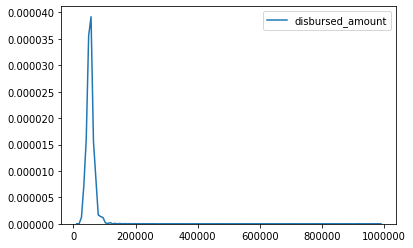

In [49]:
sns.kdeplot(df_train['disbursed_amount'])
plt.show()

In [50]:
df_train['disbursed_amount'].describe()

count    225493.00000
mean      54240.72883
std       12775.59006
min       13320.00000
25%       47049.00000
50%       53703.00000
75%       60213.00000
max      987354.00000
Name: disbursed_amount, dtype: float64

In [20]:
df_copy=df_train.copy()

In [22]:
df_copy['disbursed_amount']=np.log(df_train['disbursed_amount'])

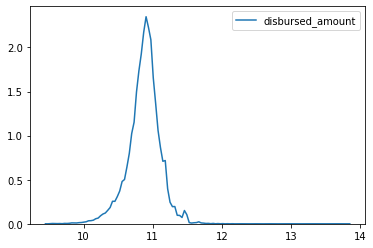

In [24]:
sns.kdeplot(df_copy['disbursed_amount'])
plt.show()

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             225493 non-null  int64  
 1   disbursed_amount                     225493 non-null  int64  
 2   asset_cost                           225493 non-null  int64  
 3   ltv                                  225493 non-null  float64
 4   branch_id                            225493 non-null  int64  
 5   supplier_id                          225493 non-null  int64  
 6   manufacturer_id                      225493 non-null  int64  
 7   Current_pincode_ID                   225493 non-null  int64  
 8   Date.of.Birth                        225493 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        225493 non-null  object 
 11  State_ID     

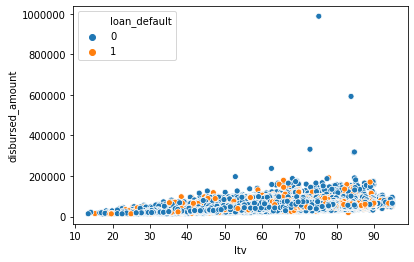

In [30]:
sns.scatterplot(df_train['ltv'],df_train['disbursed_amount'],hue=df_train['loan_default'])
plt.show()

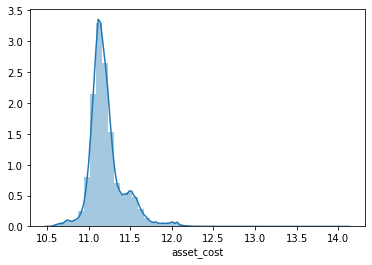

In [34]:
sns.distplot(np.log(df_train['asset_cost']))

In [37]:
df_train['disbursed_amount']/df_train['asset_cost']

0         0.866062
1         0.719222
2         0.868286
3         0.869920
4         0.868624
            ...   
233149    0.599715
233150    0.732117
233151    0.470202
233152    0.467470
233153    0.652975
Length: 225493, dtype: float64

In [51]:
df_train[df_train['ltv']==df_train['ltv'].max()]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
7851,586149,65682,72000,95.0,19,15685,86,1873,1984-01-10,Salaried,...,0,0,11771,0,1,0,1yrs 1mon,2yrs 8mon,0,1
12708,644909,66489,72951,95.0,19,14237,45,1842,1967-01-06,Salaried,...,0,0,1750,0,1,0,1yrs 1mon,1yrs 9mon,0,0
37544,558558,70462,76000,95.0,2,15082,86,2374,1995-05-07,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
87618,634939,63763,70050,95.0,61,18344,45,1324,1963-01-01,Salaried,...,0,0,30737,0,1,1,1yrs 2mon,4yrs 3mon,1,0
87635,600050,65342,71729,95.0,61,18344,45,1365,1987-11-05,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
112677,462138,64212,70529,95.0,61,18207,86,1313,1982-05-22,Salaried,...,0,0,1649,0,0,0,1yrs 5mon,4yrs 0mon,3,0
147555,499733,57744,63583,95.0,61,18344,45,1310,1970-01-06,Salaried,...,0,0,1520,0,1,0,0yrs 4mon,0yrs 11mon,0,1
147570,607815,59004,64920,95.0,61,18344,45,1316,1985-01-04,Self employed,...,0,0,5774,0,6,0,0yrs 3mon,0yrs 9mon,1,0


In [61]:
x=df_train[df_train['asset_cost']>63583]

In [66]:
x

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
11,486821,64769,74190,89.23,67,22807,45,1446,1984-07-09,Salaried,...,0,0,0,0,0,0,2yrs 1mon,2yrs 3mon,1,0
16,513916,57713,65750,89.28,67,22807,45,1440,1976-01-06,Self employed,...,0,0,47100,0,1,1,2yrs 6mon,5yrs 6mon,0,0
18,492995,70017,86760,82.99,67,22807,45,1479,1988-10-08,Self employed,...,0,0,0,0,0,0,1yrs 9mon,1yrs 9mon,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,1988-01-08,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,1988-05-12,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,1976-01-06,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,1994-03-26,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
